In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv('transformed_df.csv')
display(df.head())

,Question,Question Category,LLM,Number of Sources,Trust Score,Are All Source Links Functional_all_links_functional,Are All Source Links Functional_no_links_functional,Are All Source Links Functional_some_links_functional,Multi-modal Response_multi-modal,Multi-modal Response_text_only,...,www.yellowbrick.co,www.yourdictionary.com,www.youtube.com,www.zavvi.com,www.zerohanger.com,wwww.britannica.com,y20india.in,yaleclimateconnections.org,yourstory.com,youtube.com
0,"""where does the saying keeping up with the jon...",4,3,2,10,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,"""when did day light savings start in the us""",6,3,1,9,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,"""what is the doll in the garden about""",2,3,3,11,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,"""where is a unitary system of government found""",9,3,3,11,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"""who dies in season 2 of the originals""",2,3,1,9,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Preparing our Data for Clustering Analysis



In [3]:
df.drop('Question', axis=1, inplace=True)
display(df.head())
df.shape

,Question Category,LLM,Number of Sources,Trust Score,Are All Source Links Functional_all_links_functional,Are All Source Links Functional_no_links_functional,Are All Source Links Functional_some_links_functional,Multi-modal Response_multi-modal,Multi-modal Response_text_only,Unnamed: 10,...,www.yellowbrick.co,www.yourdictionary.com,www.youtube.com,www.zavvi.com,www.zerohanger.com,wwww.britannica.com,y20india.in,yaleclimateconnections.org,yourstory.com,youtube.com
0,4,3,2,10,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,6,3,1,9,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,3,11,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,9,3,3,11,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,3,1,9,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


(500, 1083)

#### Due to the vast number of features (primarily due to the urls in our dataset's attributed sources), we chose to do some feature selection using `Sci-kit Learn`'s `VarianceThreshold` method.  This will remove the features with low-variance and significantly reduce our dataset dimensionality (from 1083 feature columns to just 38).

In [4]:
from sklearn.feature_selection import VarianceThreshold

threshold = 0.01
selector = VarianceThreshold(threshold)

df_reduced = selector.fit_transform(df)

selected_features = df.columns[selector.get_support()]

df_reduced = pd.DataFrame(df_reduced, columns=selected_features)

display(df_reduced.shape)

df_reduced.head()

(500, 38)

,Question Category,LLM,Number of Sources,Trust Score,Are All Source Links Functional_all_links_functional,Are All Source Links Functional_some_links_functional,Multi-modal Response_multi-modal,Multi-modal Response_text_only,Unnamed: 10,www.amazon.com,...,www.study.com,www.themoviedb.org,www.thoughtco.com,www.tvguide.com,www.verywellhealth.com,www.webmd.com,www.wikipedia.org,www.wikiwand.com,www.yahoo.com,www.youtube.com
0,4,3,2,10,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,3,1,9,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,3,3,11,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,3,3,11,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,3,1,9,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
scaler = StandardScaler()
df_reduced_scaled = scaler.fit_transform(df_reduced)
df_reduced_scaled = pd.DataFrame(df_reduced_scaled, columns=selected_features)

display(df_reduced_scaled.head())

,Question Category,LLM,Number of Sources,Trust Score,Are All Source Links Functional_all_links_functional,Are All Source Links Functional_some_links_functional,Multi-modal Response_multi-modal,Multi-modal Response_text_only,Unnamed: 10,www.amazon.com,...,www.study.com,www.themoviedb.org,www.thoughtco.com,www.tvguide.com,www.verywellhealth.com,www.webmd.com,www.wikipedia.org,www.wikiwand.com,www.yahoo.com,www.youtube.com
0,-0.536683,0.0,-0.507689,-0.021955,0.648425,-0.163383,-0.546536,0.59583,-0.61125,-0.163383,...,-0.142857,-0.110208,-0.169725,-0.110208,-0.110208,-0.119159,-0.984126,-0.119159,-0.110208,-0.286794
1,0.046668,0.0,-0.763580,-0.181053,0.648425,-0.163383,-0.546536,0.59583,-0.61125,-0.163383,...,-0.142857,-0.110208,-0.169725,-0.110208,-0.110208,-0.119159,1.016130,-0.119159,-0.110208,-0.286794
2,-1.120033,0.0,-0.251797,0.137142,0.648425,-0.163383,-0.546536,0.59583,-0.61125,-0.163383,...,-0.142857,-0.110208,-0.169725,-0.110208,-0.110208,-0.119159,-0.984126,-0.119159,-0.110208,-0.286794
3,0.921694,0.0,-0.251797,0.137142,0.648425,-0.163383,-0.546536,0.59583,-0.61125,-0.163383,...,-0.142857,-0.110208,-0.169725,-0.110208,-0.110208,-0.119159,1.016130,-0.119159,-0.110208,-0.286794
4,-1.120033,0.0,-0.763580,-0.181053,0.648425,-0.163383,-0.546536,0.59583,-0.61125,-0.163383,...,-0.142857,-0.110208,-0.169725,-0.110208,-0.110208,-0.119159,1.016130,-0.119159,-0.110208,-0.286794


In [6]:
print(df_reduced_scaled.columns)

Index(['Question Category', 'LLM', 'Number of Sources', 'Trust Score',
       'Are All Source Links Functional_all_links_functional',
       'Are All Source Links Functional_some_links_functional',
       'Multi-modal Response_multi-modal', 'Multi-modal Response_text_only',
       'Unnamed: 10', 'www.amazon.com', 'www.bbc.com',
       'www.behindthevoiceactors.com', 'www.britannica.com', 'www.byjus.com',
       'www.clevelandclinic.org', 'www.ew.com', 'www.healthline.com',
       'www.history.com', 'www.imdb.com', 'www.kenhub.com',
       'www.nationalgeographic.com', 'www.ncbi.nlm.nih.gov', 'www.reddit.com',
       'www.rottentomatoes.com', 'www.sciencedirect.com', 'www.si.com',
       'www.space.com', 'www.sportskeeda.com', 'www.study.com',
       'www.themoviedb.org', 'www.thoughtco.com', 'www.tvguide.com',
       'www.verywellhealth.com', 'www.webmd.com', 'www.wikipedia.org',
       'www.wikiwand.com', 'www.yahoo.com', 'www.youtube.com'],
      dtype='object')


In [7]:
df_reduced_scaled.drop(columns='Unnamed: 10', inplace=True)

## Determining the Optimal Number of Clusters

#### In order to determine the best number of clusters to use in our K-Means clustering algorithm, we chose to experiment with two different clustering evaluation approaches: 
 - #### Elbow Method - to visualize the number of clusters vs inertia
 - #### Silhouette Score - to act as a secondary check and provide more granular values

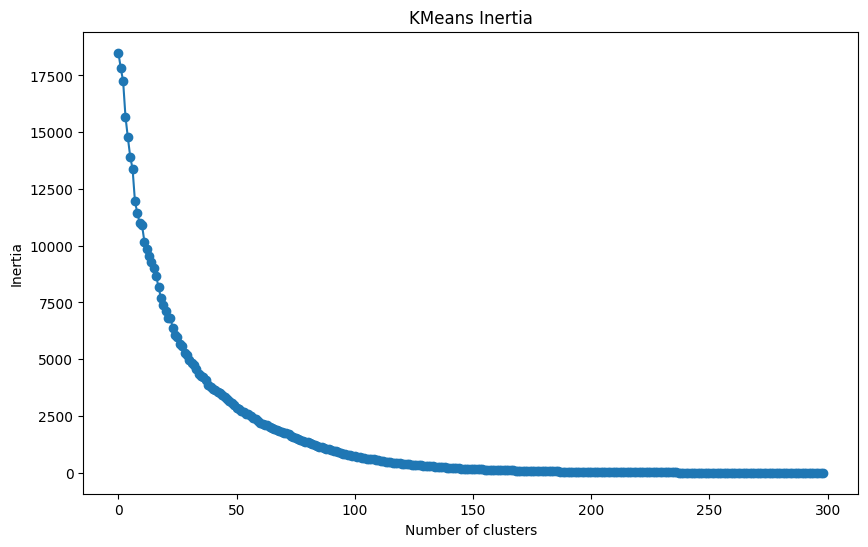

In [8]:
from sklearn.cluster import KMeans

inertia = []
range_clusters = range(1, 300)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_reduced_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(inertia, marker='o')
plt.title('KMeans Inertia')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [9]:
from sklearn.metrics import silhouette_score

for k in range(10, 200, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_reduced_scaled)
    score = silhouette_score(df_reduced_scaled, kmeans.labels_)
    print(f'Number of clusters: {k}, silhouette score: {score}')

Number of clusters: 10, silhouette score: 0.19294366451930595
Number of clusters: 20, silhouette score: 0.260938179723075
Number of clusters: 30, silhouette score: 0.31520861980358483
Number of clusters: 40, silhouette score: 0.3326996651377193
Number of clusters: 50, silhouette score: 0.35089313592838356
Number of clusters: 60, silhouette score: 0.3614796934663614
Number of clusters: 70, silhouette score: 0.36882790974409824
Number of clusters: 80, silhouette score: 0.4063243236565395
Number of clusters: 90, silhouette score: 0.4020936185114706
Number of clusters: 100, silhouette score: 0.4298200152958047
Number of clusters: 110, silhouette score: 0.40886639015029896
Number of clusters: 120, silhouette score: 0.4648612145165826
Number of clusters: 130, silhouette score: 0.4658800798533573
Number of clusters: 140, silhouette score: 0.4642873613315188
Number of clusters: 150, silhouette score: 0.4717870538760107
Number of clusters: 160, silhouette score: 0.4765337717491949
Number of clu

#### Given the silhouette scores of the various number of clusters, we decided to use 50 clusters for exploration moving forward.  Ideally, we would have liked to see a cluster number that would have been closer to 1, but we could not find a number of clusters that surpassed .49001.  Although choosing a cluster size of 160-180 would have been more accurate, we also noticed that it was extremely difficult to analyze the resulting cluster plot.  We chose 50 because it was still significantly above the .25 threshold to be moderately accurate, but small enough to be able to visualize the clusters in the proceeding plot below.

In [10]:
kmeans = KMeans(n_clusters=50, random_state=42).fit(df_reduced_scaled)

In [11]:
from collections import Counter
cluster_sizes = Counter(kmeans.labels_)
print("Cluster Sizes: ", cluster_sizes) 

Cluster Sizes:  Counter({45: 77, 0: 57, 42: 46, 17: 44, 5: 35, 22: 31, 2: 28, 47: 12, 49: 11, 3: 11, 11: 11, 41: 7, 13: 7, 35: 7, 14: 7, 23: 6, 20: 6, 24: 6, 18: 6, 38: 6, 29: 6, 37: 6, 7: 6, 8: 5, 1: 5, 4: 5, 43: 4, 28: 4, 21: 4, 34: 3, 44: 3, 19: 3, 6: 3, 15: 2, 25: 2, 9: 2, 10: 2, 31: 2, 12: 1, 33: 1, 27: 1, 32: 1, 36: 1, 46: 1, 26: 1, 30: 1, 39: 1, 40: 1, 16: 1, 48: 1})


In [12]:
df_reduced['Cluster'] = kmeans.labels_
display(df_reduced)

,Question Category,LLM,Number of Sources,Trust Score,Are All Source Links Functional_all_links_functional,Are All Source Links Functional_some_links_functional,Multi-modal Response_multi-modal,Multi-modal Response_text_only,Unnamed: 10,www.amazon.com,...,www.themoviedb.org,www.thoughtco.com,www.tvguide.com,www.verywellhealth.com,www.webmd.com,www.wikipedia.org,www.wikiwand.com,www.yahoo.com,www.youtube.com,Cluster
0,4,3,2,10,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,17
1,6,3,1,9,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,42
2,2,3,3,11,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,17
3,9,3,3,11,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,49
4,2,3,1,9,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,7,1,10,17,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,3
496,1,1,9,16,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,31
497,6,1,11,18,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,2
498,2,1,6,14,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,29


In [13]:
cluster_summary = df_reduced.groupby('Cluster').mean()
cluster_summary.head()

,Question Category,LLM,Number of Sources,Trust Score,Are All Source Links Functional_all_links_functional,Are All Source Links Functional_some_links_functional,Multi-modal Response_multi-modal,Multi-modal Response_text_only,Unnamed: 10,www.amazon.com,...,www.study.com,www.themoviedb.org,www.thoughtco.com,www.tvguide.com,www.verywellhealth.com,www.webmd.com,www.wikipedia.org,www.wikiwand.com,www.yahoo.com,www.youtube.com
Cluster,,,,,,,,,,,,,,,,,,,,,
0,2.578947,3.140351,0.000000,0.842105,0.0,0.0,0.035088,0.771930,1.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,6.000000,1.600000,8.000000,15.600000,1.0,0.0,0.000000,1.000000,0.0,0.0,...,0.0,0.0,0.400000,0.0,0.0,0.0,0.800000,0.0,0.0,0.000000
2,5.357143,1.000000,9.750000,16.785714,1.0,0.0,0.000000,1.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.964286,0.0,0.0,0.107143
3,4.636364,3.000000,8.272727,16.454545,1.0,0.0,0.454545,0.545455,0.0,1.0,...,0.0,0.0,0.090909,0.0,0.0,0.0,0.818182,0.0,0.0,0.090909
4,4.200000,2.800000,6.200000,14.400000,1.0,0.0,0.400000,0.600000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.800000,0.0,1.0,0.000000


In [14]:
cluster_sizes = Counter(kmeans.labels_)
print("Cluster Sizes: ", cluster_sizes)

Cluster Sizes:  Counter({45: 77, 0: 57, 42: 46, 17: 44, 5: 35, 22: 31, 2: 28, 47: 12, 49: 11, 3: 11, 11: 11, 41: 7, 13: 7, 35: 7, 14: 7, 23: 6, 20: 6, 24: 6, 18: 6, 38: 6, 29: 6, 37: 6, 7: 6, 8: 5, 1: 5, 4: 5, 43: 4, 28: 4, 21: 4, 34: 3, 44: 3, 19: 3, 6: 3, 15: 2, 25: 2, 9: 2, 10: 2, 31: 2, 12: 1, 33: 1, 27: 1, 32: 1, 36: 1, 46: 1, 26: 1, 30: 1, 39: 1, 40: 1, 16: 1, 48: 1})


#### Before we plot our clusters, we apply PCA to further account for possible correlation between the features...

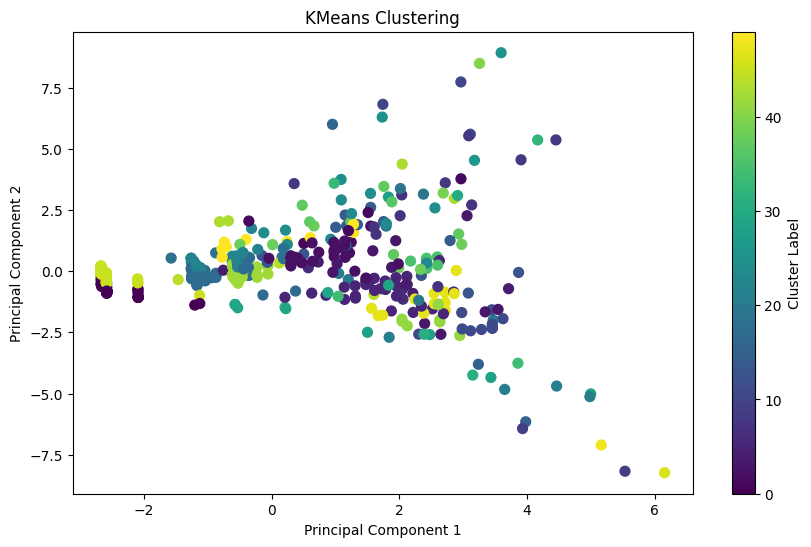

In [41]:

pca = PCA(n_components=37)
df_reduced_pca = pca.fit_transform(df_reduced_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_reduced_pca[:, 0], df_reduced_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.colorbar(scatter, label='Cluster Label')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering')
plt.show()

In [42]:
explained_variance = pca.explained_variance_ratio_ 
cumulative_variance = explained_variance.cumsum()  

for i, (variance, cumulative) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"Principal Component {i+1}: {variance:.2f}% of variance ({cumulative:.2f}% cumulative)")


Principal Component 1: 0.11% of variance (0.11% cumulative)
Principal Component 2: 0.08% of variance (0.20% cumulative)
Principal Component 3: 0.08% of variance (0.28% cumulative)
Principal Component 4: 0.06% of variance (0.34% cumulative)
Principal Component 5: 0.04% of variance (0.38% cumulative)
Principal Component 6: 0.04% of variance (0.42% cumulative)
Principal Component 7: 0.04% of variance (0.46% cumulative)
Principal Component 8: 0.04% of variance (0.50% cumulative)
Principal Component 9: 0.03% of variance (0.53% cumulative)
Principal Component 10: 0.03% of variance (0.56% cumulative)
Principal Component 11: 0.03% of variance (0.59% cumulative)
Principal Component 12: 0.03% of variance (0.62% cumulative)
Principal Component 13: 0.03% of variance (0.65% cumulative)
Principal Component 14: 0.03% of variance (0.67% cumulative)
Principal Component 15: 0.03% of variance (0.70% cumulative)
Principal Component 16: 0.02% of variance (0.72% cumulative)
Principal Component 17: 0.02% of 

#### The above output was interesting.  It takes the 25 of the 37 components to acheive 90% variance.  A key explanation could be the `VarianceThreshold` we applied before conducting PCA, though these results indicate that there is still likely overlapping feature data.